# Identifying Habitable Exoplanets Through Machine Learning: An Analysis Using the Iris Dataset

## What is the problem?
The primary goal of this project is to build and evaluate both supervised and unsupervised machine learning models on the given dataset.  
We aim to classify or cluster the data effectively and compare different algorithms to determine which performs best.
## Machine Learning Model Comparison 

In this notebook, we explore and compare the performance of various machine learning models on a classification task. Both supervised and unsupervised learning techniques are employed to gain insights into the data and evaluate which approaches yield the best results.

Five popular supervised learning models and three widely used unsupervised learning models are trained and evaluated. Their performance metrics are then compared to understand their strengths and weaknesses for this specific problem.
### Supervised Learning
- Logistic Regression
- Decision Tree
- Support Vector Machine (SVM)
- k-Nearest Neighbors (k-NN)
### Unsupervised Learning
* K-Means Clustering  
* Hierarchical Clustering  
* DBSCAN

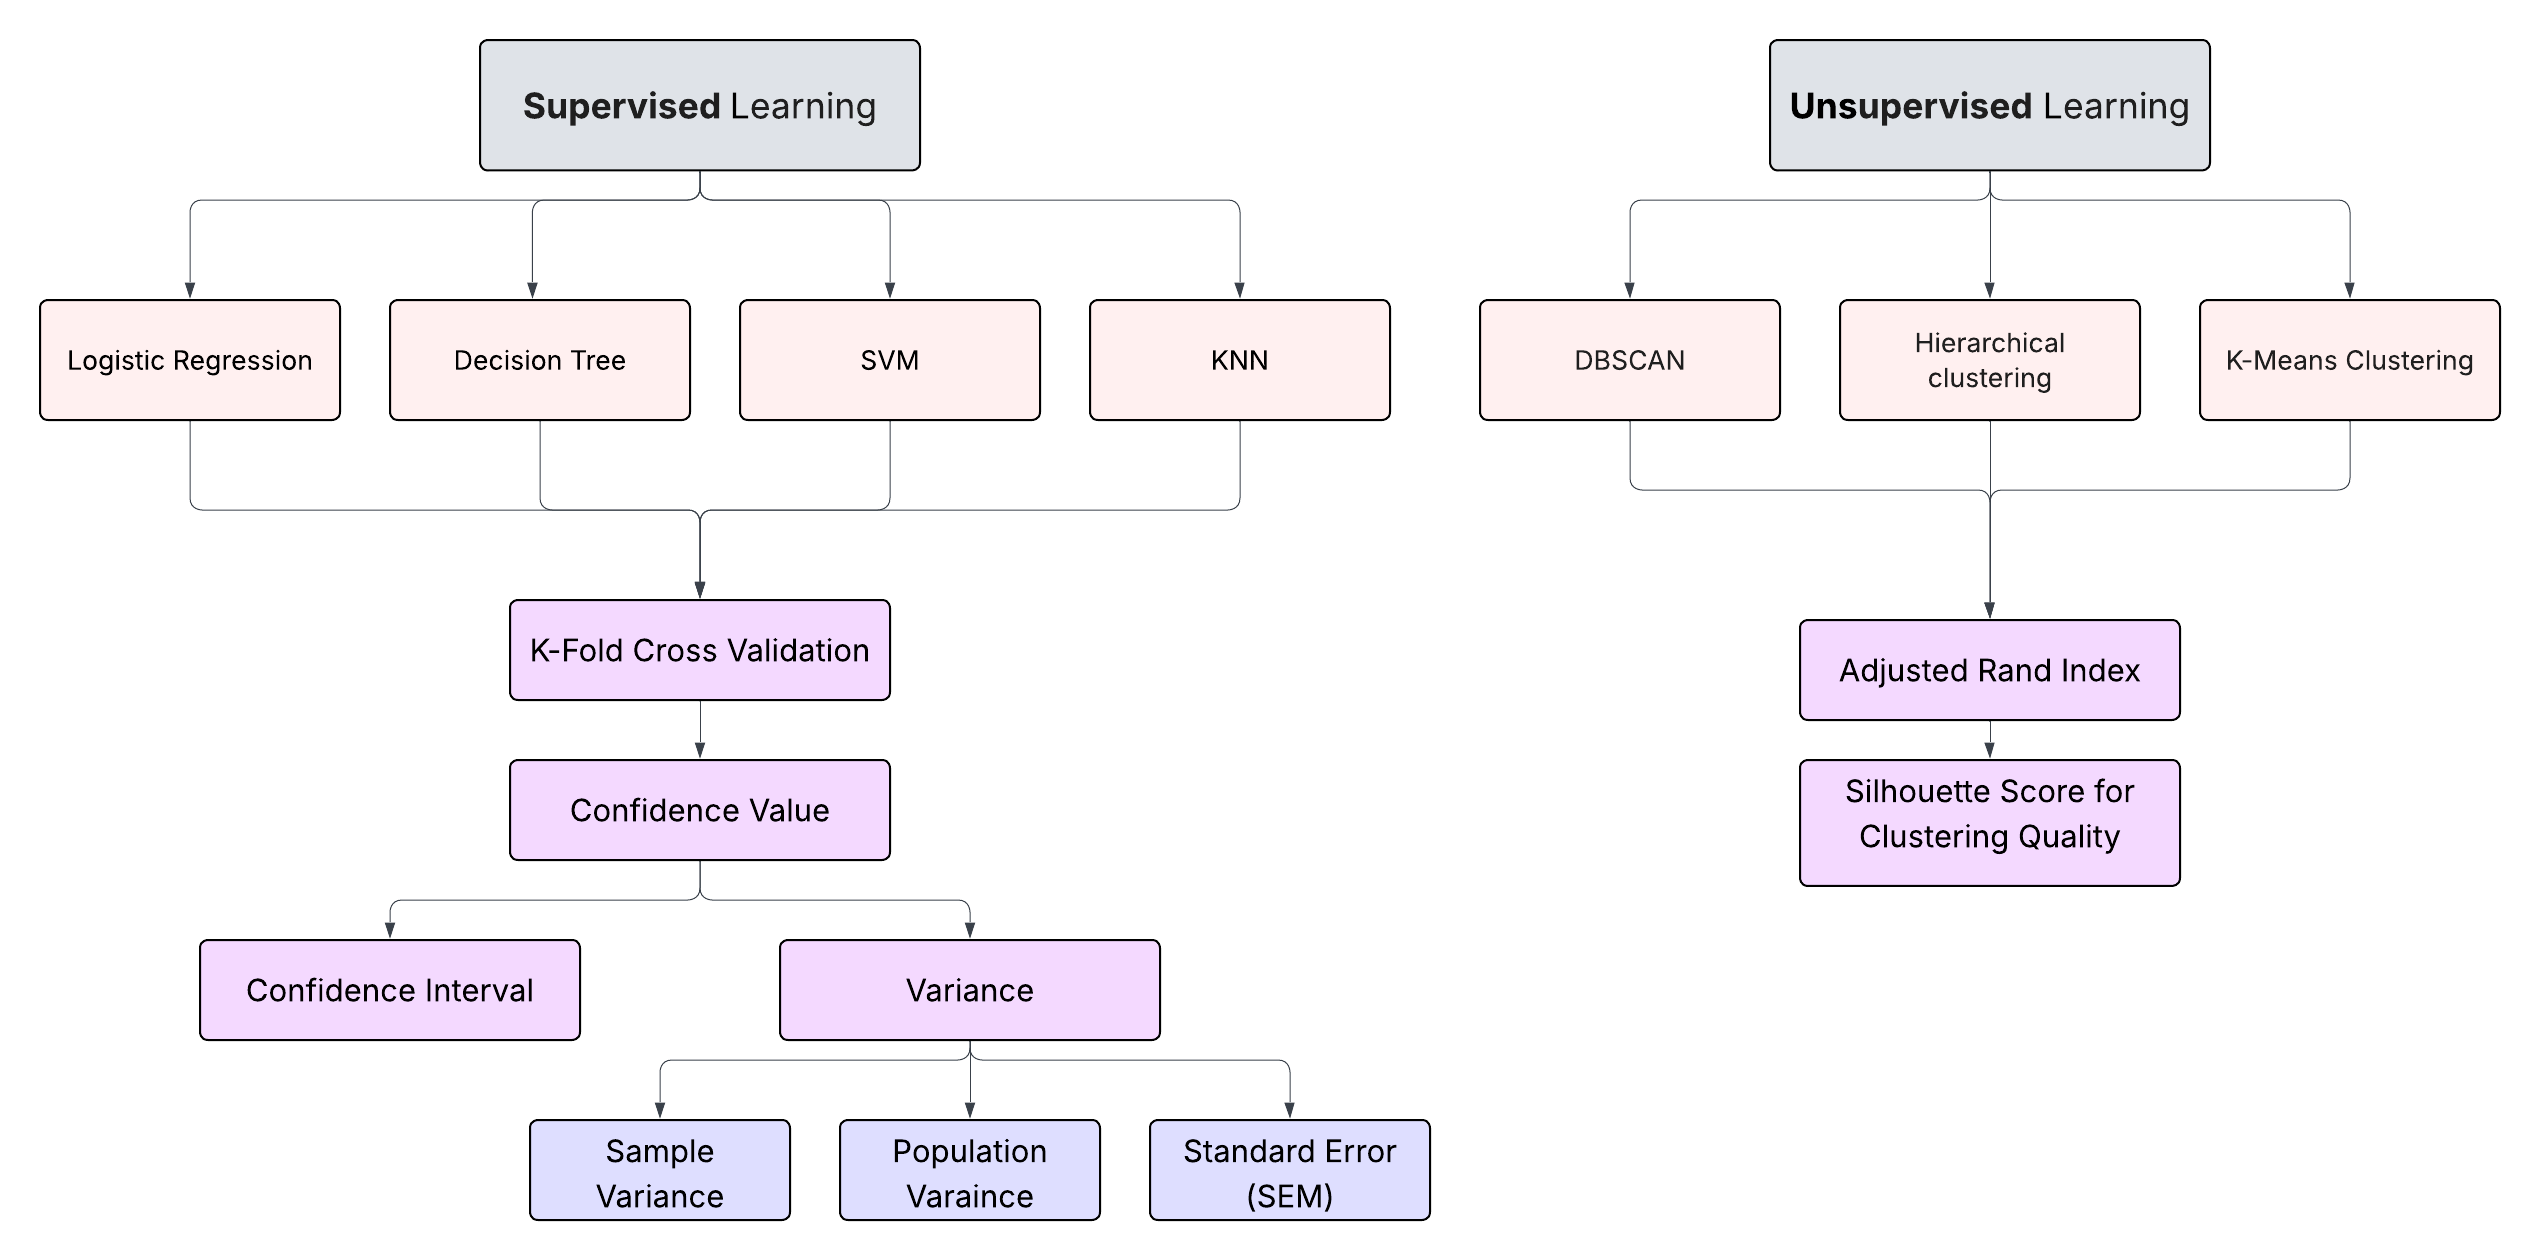

In [1]:
from IPython.display import Image
Image(filename="Flowchart.png", width=1300)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import warnings

from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import v_measure_score
from sklearn.cluster import AgglomerativeClustering

from scipy.optimize import linear_sum_assignment
from scipy.stats import t
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [3]:
warnings.filterwarnings("ignore")

## Dataset Description
In this work, we make use of the popular [Iris dataset](https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv), which is frequently used to illustrate clustering and classification algorithms. The dataset includes 150 iris flower samples with four characteristics: petal length, petal width, sepal length, and sepal width from three distinct species (setosa, versicolour, and virginica). This public repository is the source of the data. 

In [4]:
df = pd.read_csv('iris.csv')
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Supervised Learning
In the simplest terms, if our task is to understand/predict a collection of data points (the response variables, the dependent variables) in terms of other data points (the independent variables), then we are tasked with solving a supervised learning problem. We need to come up with a mathematical/statistical/computational model that explains the response variable in terms of the independent variables. The type of the response variable also is important. If the response variable is categorical then the problem is called a classification problem.

## Logistic Regression

In [6]:
iris = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [7]:
iris['species'] = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [8]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

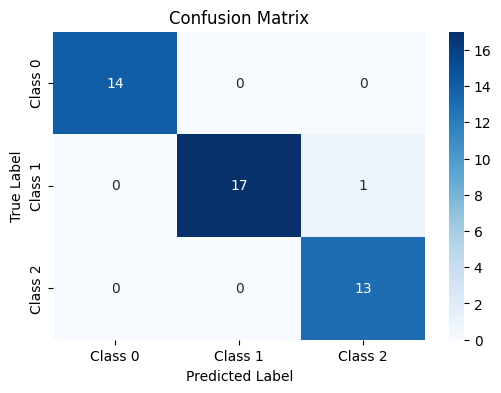

Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        14
     Class 1       1.00      0.94      0.97        18
     Class 2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [10]:
y_pred = log_model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['Class 0', 'Class 1', 'Class 2']
df_cm = pd.DataFrame(conf_mat, index=labels, columns=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))

In [11]:
log_cv = cross_val_score(log_model, X, y, cv=5)
log_mean = np.mean(log_cv)
log_std = np.std(log_cv, ddof=1)
print("Mean Accuracy:", log_mean)

Mean Accuracy: 0.9733333333333334


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.9777777777777777


### Confidence Value
A confidence value tells us how sure we are about a result or prediction. It doesn’t say if something is right or wrong, but it gives a level of certainty. For example, if a model says, “I’m 95% confident this is a cat,” the confidence value is 0.95. It means the model strongly believes it's a cat, but there’s still a small chance it could be wrong. So, the higher the confidence value, the more certain the model is about its guess.



In [13]:
logreg_confidence = logreg.predict_proba(X_test)
print("\nLogistic Regression Confidence Values:")
for i in range(5):
    row = X_test.iloc[i].values.reshape(1, -1)
    predicted_class = logreg.predict(row)[0]
    confidence = max(logreg_confidence[i])
    print(f"Sample {i+1}: Predicted = {predicted_class}, Confidence = {confidence:.2f}")


Logistic Regression Confidence Values:
Sample 1: Predicted = 0, Confidence = 0.99
Sample 2: Predicted = 1, Confidence = 0.72
Sample 3: Predicted = 1, Confidence = 0.87
Sample 4: Predicted = 0, Confidence = 0.99
Sample 5: Predicted = 2, Confidence = 0.98


### Variance
In simple terms, variance tells us how spread out our data is. It measures how far each value in the dataset is from the average (mean). So, if all the data points are close to the mean, the variance is small. But if the data points are scattered and far from the mean, the variance is large. We use variance when we want to understand how consistent or variable our data is.



In [14]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [15]:
log_model = LogisticRegression(max_iter=200)

In [16]:
cv_scores = cross_val_score(log_model, X, y, cv=5)
print("Cross-Validation Scores (Sample):")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
    

Cross-Validation Scores (Sample):
  Fold 1: 0.9667
  Fold 2: 1.0000
  Fold 3: 0.9333
  Fold 4: 0.9667
  Fold 5: 1.0000


In [17]:
print(f"\nMean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores, ddof=1):.4f}")


Mean Accuracy: 0.9733
Standard Deviation: 0.0279


#### Sample Variance
The sample variance measures how spread out the data points are around the sample mean. It is calculated by averaging the squared deviations from the mean, dividing by n-1 to correct for bias in estimating the population variance.
$$
s^2 = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})^2
$$

In [18]:
sample_variance = np.var(cv_scores, ddof=1)
print("Sample Variance:", sample_variance)

Sample Variance: 0.0007777777777777775


#### Population Varaince
Population variance measures the average squared deviation of each data point from the true population mean. It is calculated by dividing the sum of squared differences by the total number of data points n.
$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2
$$

In [19]:
population_variance = np.var(cv_scores, ddof=0)
print("Population Variance:", population_variance)

Population Variance: 0.000622222222222222


### Standard Error (SEM)

The standard error measures the precision of the sample mean as an estimate of the population mean. It is calculated by taking the square root of the sample variance divided by the sample size, reflecting the variability of the sample mean across different samples.
$$
SE = \sqrt{\frac{s^2}{n}}
$$

In [20]:
standard_error = np.sqrt(sample_variance / len(cv_scores))
print("Standard Error:", standard_error)

Standard Error: 0.01247219128924647


### Confidence Interval
The 95% confidence interval tells us that we are 95% confident the true mean performance of the KNN model lies within this range. It accounts for variability in cross-validation scores using the sample mean and standard error.
$$
\bar{x} \pm t_{\alpha/2,\,n-1} \times \frac{s}{\sqrt{n}}
$$

In [21]:
cv_scores = [0.96666667, 1.0, 0.93333333, 0.96666667, 1.0]
mean_score = np.mean(cv_scores)
sample_variance = np.var(cv_scores, ddof=1)
standard_error = np.sqrt(sample_variance / len(cv_scores))
n = len(cv_scores)
df = n - 1
confidence = 0.95
t_critical = t.ppf((1 + confidence) / 2, df)
margin_of_error = t_critical * standard_error
ci_lower = max(0, mean_score - margin_of_error)  
ci_upper = min(1, mean_score + margin_of_error)  

In [22]:
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

95% Confidence Interval: [0.9387, 1.0000]


## Decision Tree

In [23]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

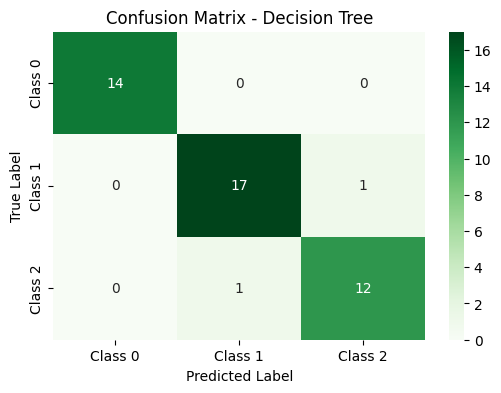

In [24]:
y_pred_tree = tree_model.predict(X_test)
labels = ['Class 0', 'Class 1', 'Class 2']
conf_mat = confusion_matrix(y_test, y_pred_tree)
df_cm = pd.DataFrame(conf_mat, index=labels, columns=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Greens')  # Changed cmap to Greens
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [25]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_tree, target_names=labels))

Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        14
     Class 1       0.94      0.94      0.94        18
     Class 2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [26]:
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
class_names = ['Setosa', 'Versicolor', 'Virginica']

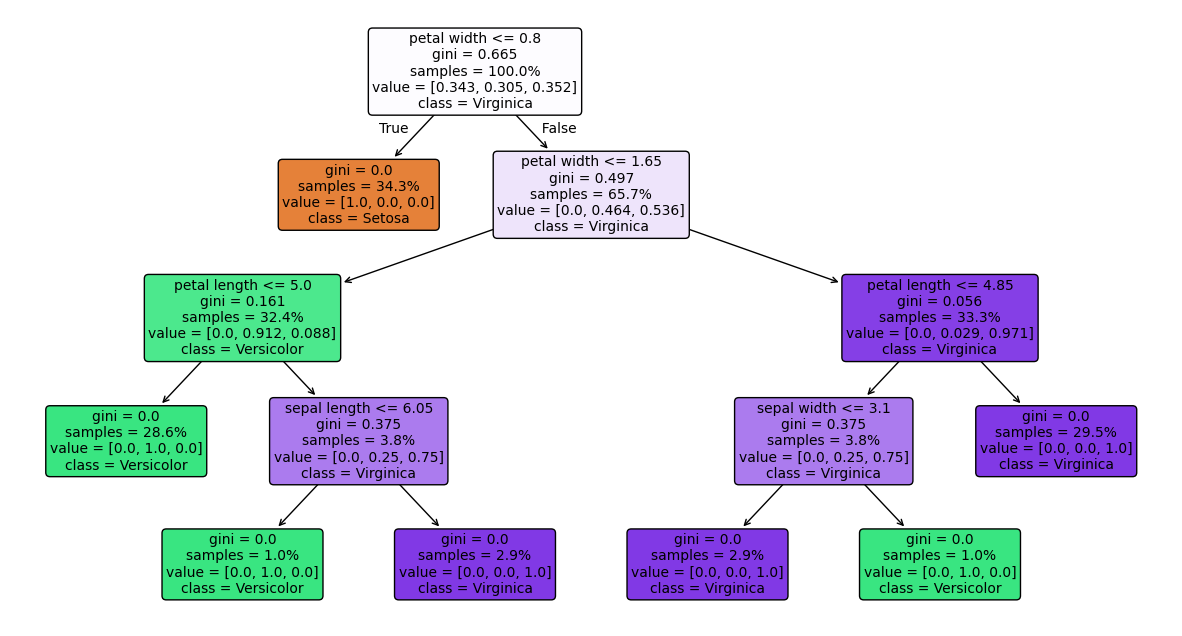

In [27]:
X_df = pd.DataFrame(X, columns=feature_names)
plt.figure(figsize=(15, 8)) 
plot_tree(
    tree_model,
    filled=True,
    feature_names=feature_names,
    class_names=class_names,
    rounded=True,
    fontsize=10,
    proportion=True 
)
plt.title("")
plt.show()

In [28]:
tree_cv = cross_val_score(tree_model, X, y, cv=5)
print("Cross-Validation Scores (Decision Tree):")
for i, score in enumerate(tree_cv, 1):
    print(f"  Fold {i}: {score:.4f}")
tree_mean = np.mean(tree_cv)
tree_std = np.std(tree_cv, ddof=1)

Cross-Validation Scores (Decision Tree):
  Fold 1: 0.9667
  Fold 2: 0.9667
  Fold 3: 0.9000
  Fold 4: 1.0000
  Fold 5: 1.0000


In [29]:
print(f"\nMean Accuracy: {tree_mean:.4f}")
print(f"Standard Deviation: {tree_std:.4f}")


Mean Accuracy: 0.9667
Standard Deviation: 0.0408


In [30]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Accuracy:", accuracy_tree)

Decision Tree Accuracy: 0.9555555555555556


### Confidence Value

In [31]:
tree_confidence = dtree.predict_proba(X_test)
print("\nDecision Tree Confidence Values:")
for i in range(5):
    row = X_test.iloc[i].values.reshape(1, -1)
    predicted_class = dtree.predict(row)[0]
    confidence = max(tree_confidence[i])
    print(f"Sample {i+1}: Predicted = {predicted_class}, Confidence = {confidence:.2f}")



Decision Tree Confidence Values:
Sample 1: Predicted = 0, Confidence = 1.00
Sample 2: Predicted = 1, Confidence = 1.00
Sample 3: Predicted = 1, Confidence = 1.00
Sample 4: Predicted = 0, Confidence = 1.00
Sample 5: Predicted = 2, Confidence = 1.00


### Variance

#### Sample Variance

In [32]:
sample_variance1 = np.var(tree_cv, ddof=1)
print("Sample Variance:", sample_variance1)

Sample Variance: 0.0016666666666666661


#### Population Variance

In [33]:
population_variance1 = np.var(tree_cv, ddof=0)
print("Population Variance:", population_variance1)

Population Variance: 0.0013333333333333329


### Standard Error (SEM)

In [34]:
standard_error1 = np.sqrt(sample_variance1 / len(tree_cv))
print("Standard Error:", standard_error1)

Standard Error: 0.018257418583505533


#### Confidence Interval

In [35]:
tree_cv = [0.96666667, 0.96666667, 0.9, 0.93333333, 1.0]

mean_score1 = np.mean(tree_cv)
sample_variance1 = np.var(tree_cv, ddof=1)
n = len(tree_cv)
standard_error1 = np.sqrt(sample_variance1 / n)
df = n - 1
confidence = 0.95
t_critical = t.ppf((1 + confidence) / 2, df)
margin_of_error1 = t_critical * standard_error1


ci_raw_lower1 = mean_score1 - margin_of_error1
ci_raw_upper1 = mean_score1 + margin_of_error1

ci_clipped_lower1 = max(0, ci_raw_lower1)
ci_clipped_upper1 = min(1, ci_raw_upper1)

In [36]:
print(f"95% Confidence Interval: [{ci_raw_lower1:.4f}, {ci_raw_upper1:.4f}]")

95% Confidence Interval: [0.9061, 1.0005]


## Support Vector Machine 

In [37]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

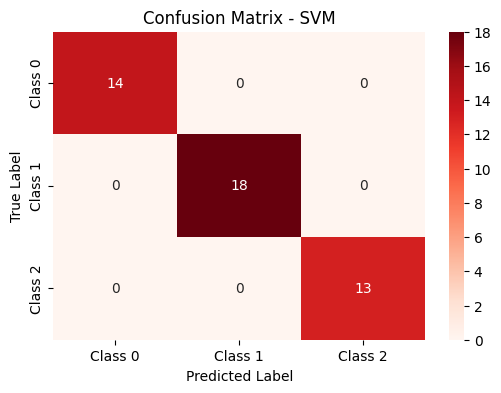

In [38]:
y_pred_svm = svm_model.predict(X_test)
labels = ['Class 0', 'Class 1', 'Class 2']
conf_mat = confusion_matrix(y_test, y_pred_svm)
df_cm = pd.DataFrame(conf_mat, index=labels, columns=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()

In [39]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_svm, target_names=labels))

Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        14
     Class 1       1.00      1.00      1.00        18
     Class 2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [40]:
svm_cv = cross_val_score(svm_model, X, y, cv=5)

print("Cross-Validation Scores (SVM):")
for i, score in enumerate(svm_cv, 1):
    print(f"  Fold {i}: {score:.4f}")

svm_mean = np.mean(svm_cv)
svm_std = np.std(svm_cv, ddof=1)
svm_se = svm_std / np.sqrt(len(svm_cv))
confidence = 0.95
z = 1.96 

svm_ci_lower = svm_mean - z * svm_se
svm_ci_upper = svm_mean + z * svm_se

Cross-Validation Scores (SVM):
  Fold 1: 0.9667
  Fold 2: 1.0000
  Fold 3: 0.9667
  Fold 4: 0.9667
  Fold 5: 1.0000


In [41]:
print(f"\nMean Accuracy: {svm_mean:.4f}")
print(f"Standard Deviation: {svm_std:.4f}")
print(f"95% Confidence Interval: [{svm_ci_lower:.4f}, {svm_ci_upper:.4f}]")


Mean Accuracy: 0.9800
Standard Deviation: 0.0183
95% Confidence Interval: [0.9640, 0.9960]


In [42]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9777777777777777


### Variance

#### Sample Variance

In [43]:
sample_variance2 = np.var(svm_cv, ddof=1)
print("Sample Variance:", sample_variance2)

Sample Variance: 0.00033333333333333316


#### Population Variance

In [44]:
population_variance2 = np.var(svm_cv, ddof=0)
print("Population Variance:", population_variance2)

Population Variance: 0.0002666666666666665


#### Standard Error

In [45]:
standard_error2 = np.sqrt(sample_variance2 / len(svm_cv))
print("Standard Error:", standard_error2)

Standard Error: 0.008164965809277258


#### Confidence Interval

In [46]:
mean_score2 = np.mean(tree_cv)

standard_error2 = np.sqrt(sample_variance2 / len(tree_cv))

n = len(tree_cv)
df = n - 1
confidence = 0.95
t_critical = t.ppf((1 + confidence) / 2, df)

margin_of_error2 = t_critical * standard_error2

ci_lower2 = mean_score2 - margin_of_error2
ci_upper2 = mean_score2 + margin_of_error2

In [47]:
print(f"95% Confidence Interval: [{ci_lower2:.4f}, {ci_upper2:.4f}]")

95% Confidence Interval: [0.9307, 0.9760]


##  K-Nearest Neighbors 

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

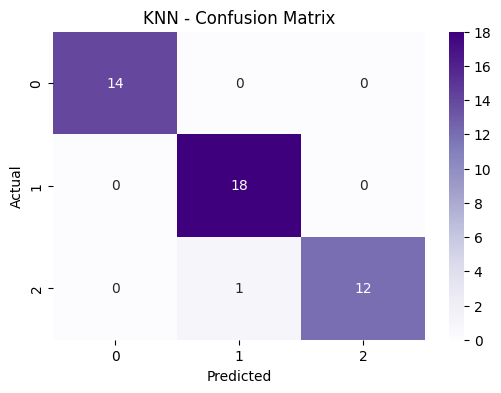

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [49]:
y_pred_knn = knn_model.predict(X_test)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test, y_pred_knn))

In [50]:
knn_cv = cross_val_score(knn_model, X, y, cv=5)
knn_mean = np.mean(knn_cv)
knn_std = np.std(knn_cv, ddof=1)

print("Cross-Validation Scores (KNN):", knn_cv)
print("Mean Accuracy:", knn_mean)

Cross-Validation Scores (KNN): [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9733333333333334


In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.9777777777777777


### Confidence Value

In [52]:
knn_confidence = knn.predict_proba(X_test)
print("\nKNN Confidence Values:")
for i in range(5):
    row = X_test.iloc[i].values.reshape(1, -1)
    predicted_class = knn.predict(row)[0]
    confidence = max(knn_confidence[i])
    print(f"Sample {i+1}: Predicted = {predicted_class}, Confidence = {confidence:.2f}")


KNN Confidence Values:
Sample 1: Predicted = 0, Confidence = 1.00
Sample 2: Predicted = 1, Confidence = 1.00
Sample 3: Predicted = 1, Confidence = 1.00
Sample 4: Predicted = 0, Confidence = 1.00
Sample 5: Predicted = 2, Confidence = 1.00


### Variance

#### Sample Variance

In [53]:
sample_variance3 = np.var(knn_cv, ddof=1)
print("Sample Variance:", sample_variance3)

Sample Variance: 0.0007777777777777775


#### Population Variance

In [54]:
population_variance3 = np.var(knn_cv, ddof=0)
print("Population Variance:", population_variance3)

Population Variance: 0.000622222222222222


#### Standard Error

In [55]:
standard_error3 = np.sqrt(sample_variance3 / len(knn_cv))
print("Standard Error:", standard_error3)

Standard Error: 0.01247219128924647


### Confidence Interval

In [56]:
mean_score3 = np.mean(knn_cv)
standard_error3 = np.sqrt(sample_variance3 / len(knn_cv))

n = len(knn_cv)
df = n - 1
confidence = 0.95
t_critical = t.ppf((1 + confidence) / 2, df)
margin_of_error3 = t_critical * standard_error3

ci_lower3 = max(0, mean_score3 - margin_of_error3)
ci_upper3 = min(1, mean_score3 + margin_of_error3)

In [57]:
print(f"KNN 95% Confidence Interval: [{ci_lower3:.4f}, {ci_upper3:.4f}]")

KNN 95% Confidence Interval: [0.9387, 1.0000]


# Unsupervised Learning
In the unsupervised scheme we don't have input/output pairs, we just have data (input). So, we don't know what we are supposed to get from an input. But we have an objective: we want our data do something specific.

## K-means Clustering 

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_kmeans = []
conf_matrices = []

In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

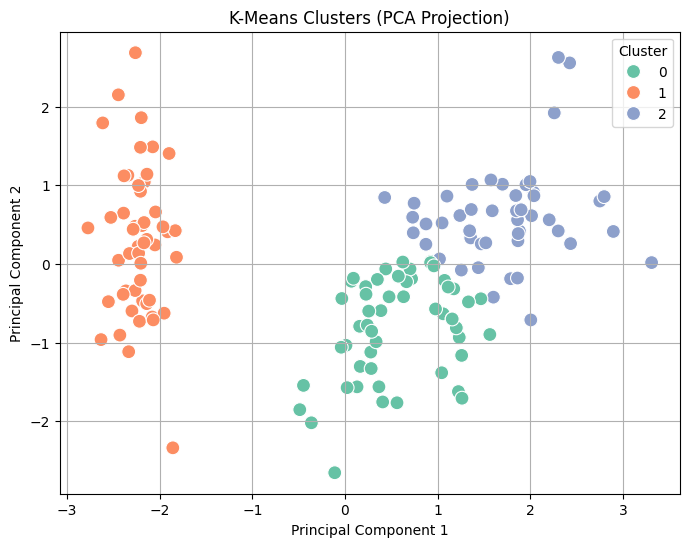

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=100)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

### Adjusted Rand Index
The Adjusted Rand Index (ARI) is a metric that measures the similarity between the clusters predicted by our model and the true class labels. It accounts for chance grouping and ranges from -1 to 1, where 1 means perfect agreement and 0 indicates random labeling. 
* Since K-Means is an unsupervised algorithm, ARI helps us evaluate how well the discovered clusters correspond to the actual classes in our dataset.

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_ari = [] 

In [63]:
for train_index, test_index in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans.fit(X_train)
    y_pred_clusters = kmeans.predict(X_test)
    ari = adjusted_rand_score(y_test, y_pred_clusters)
    cv_scores_ari.append(ari)

In [64]:
print("Adjusted Rand Index (ARI) average across folds: {:.3f}".format(np.mean(cv_scores_ari)))

Adjusted Rand Index (ARI) average across folds: 0.612


### Silhouette Score for Clustering Quality

The Silhouette Score measures how well each data point fits within its assigned cluster compared to other clusters. 

It ranges from -1 to 1:
- Values close to 1 indicate that samples are well matched to their own cluster and far from neighboring clusters.
- Values near 0 suggest overlapping clusters.
- Negative values mean samples may be assigned to the wrong cluster.

Silhouette Score is an internal metric that does **not** require true labels, making it ideal for evaluating unsupervised clustering quality.


In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [67]:
sil_score = silhouette_score(X_scaled, clusters)

In [68]:
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.460


In [69]:
inertia = []
sil_scores = []
K = range(2, 10) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)  
    sil_scores.append(silhouette_score(X_scaled, labels))

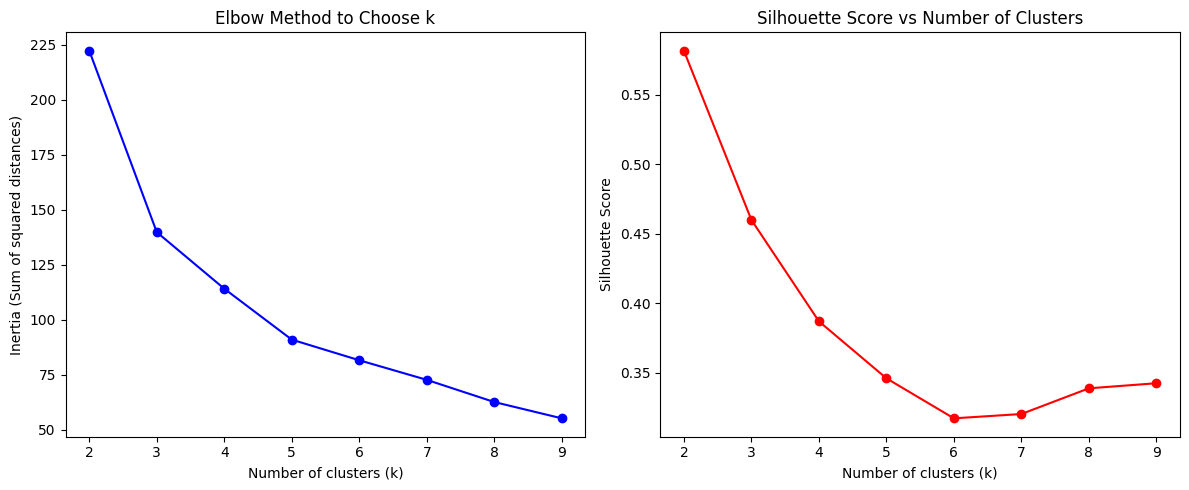

In [70]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method to Choose k')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.tight_layout()
plt.show()

In [71]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

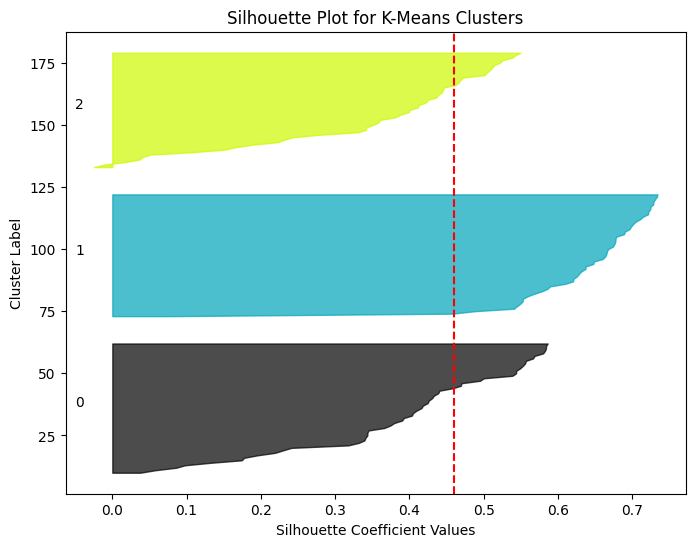

In [72]:
y_lower = 10
plt.figure(figsize=(8,6))
for i in range(k):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  
    plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for K-Means Clusters")
plt.axvline(x=silhouette_vals.mean(), color="red", linestyle="--")
plt.show()

In [73]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

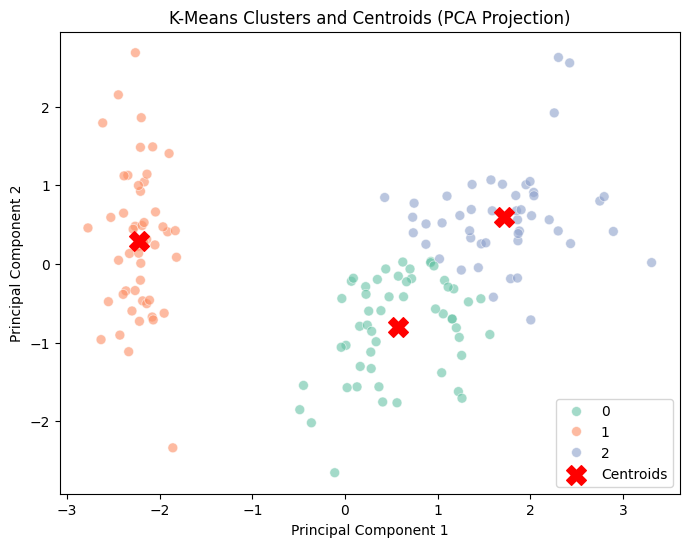

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=50, alpha=0.6)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clusters and Centroids (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## Hierarchical Clustering

In [75]:
iris_raw = load_iris()
X = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
y = pd.Series(iris_raw.target)

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
linked = linkage(X_scaled, method='ward')

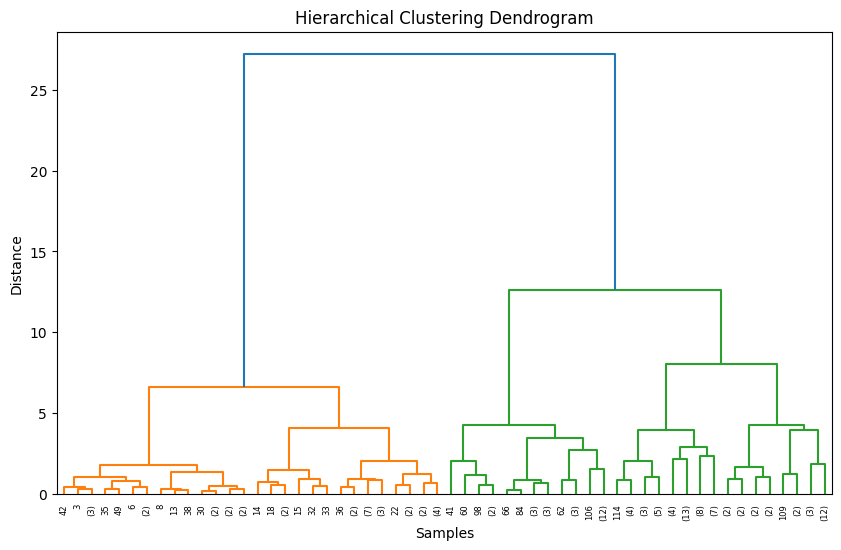

In [78]:
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [79]:
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_hc = hierarchical.fit_predict(X_scaled)

In [80]:
def cluster_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    D = max(y_pred.max(), y_true.max()) + 1
    cost_matrix = np.zeros((D, D), dtype=int)
    for i in range(len(y_pred)):
        cost_matrix[y_pred[i], y_true[i]] += 1
    row_ind, col_ind = linear_sum_assignment(cost_matrix.max() - cost_matrix)
    accuracy = cost_matrix[row_ind, col_ind].sum() / len(y_pred)
    return accuracy

In [81]:
from scipy.optimize import linear_sum_assignment

In [82]:
hc_accuracy = cluster_accuracy(y, clusters_hc)
print(f"Hierarchical Clustering Accuracy (after label): {hc_accuracy:.2f}")

Hierarchical Clustering Accuracy (after label): 0.83


### Adjusted Rand Index

In [83]:
ari_hc = adjusted_rand_score(y, clusters_hc)
print(f"Adjusted Rand Index for Hierarchical Clustering: {ari_hc:.2f}")

Adjusted Rand Index for Hierarchical Clustering: 0.62


### Silhouette Score for Clustering Quality

In [84]:
silhouette_hc = silhouette_score(X_scaled, clusters_hc)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hc:.2f}")

Silhouette Score for Hierarchical Clustering: 0.45


In [85]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

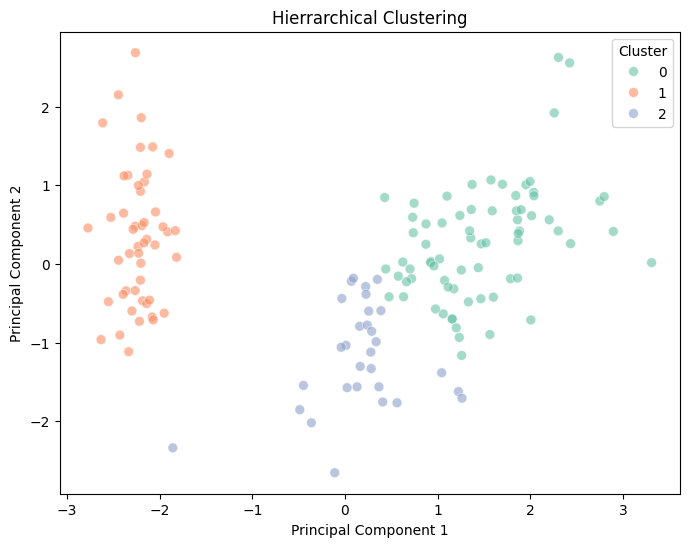

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_hc, palette="Set2", s=50, alpha=0.6)
plt.title("Hierrarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## DBSCAN

In [87]:
iris_raw = load_iris()
X = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
y = pd.Series(iris_raw.target)

In [88]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)  

In [89]:
mask = labels_dbscan != -1
y_filtered = y[mask]
labels_dbscan_filtered = labels_dbscan[mask]

In [90]:
print(f"Adjusted Rand Index (ARI): {adjusted_rand_score(y_filtered, labels_dbscan_filtered):.2f}")

Adjusted Rand Index (ARI): 0.61


In [91]:
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.5, min_samples=5)
clusters_db = db.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

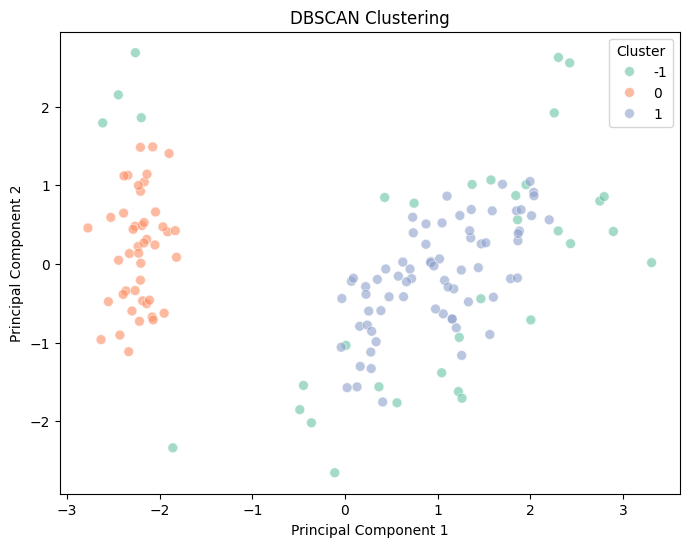

In [92]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_db, palette="Set2", s=50, alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [93]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\Mohammad-Ayazi\Projects
